# Bank churning analysis

### Importing the libraries

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Visualizing and pre processing of data 

In [11]:
Data = pd.read_csv('Bank_dataset.csv')
X_features = Data.iloc[:, 3:-1].values
y_labels = Data.iloc[:, -1].values

In [12]:
print(X_features)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [13]:
print(y_labels)

[1 0 1 ... 1 1 0]


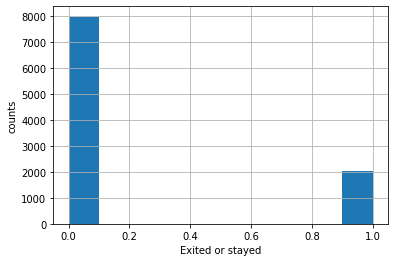

In [25]:
plt.hist(Data['Exited'])
plt.xlabel('Exited or stayed')
plt.ylabel('counts')
plt.grid()
## This plot shows that around 25% of the customers are leaving the bank.

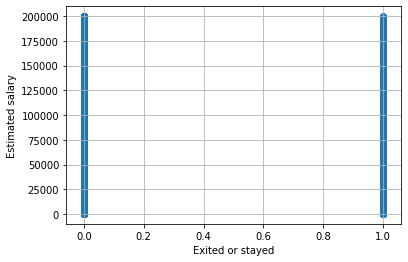

In [26]:
plt.scatter(Data['Exited'],Data['EstimatedSalary'])
plt.ylabel('Estimated salary')
plt.xlabel('Exited or stayed')
plt.grid()
## This plot shows that there is no correlation between salary and person exited.
##Person with high salary also can exit the bank

### Encoding categorical data

Label Encoding the "Gender" column

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_features[:, 2] = labelencoder.fit_transform(X_features[:, 2])

In [28]:
print(X_features)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
coloumntrans = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_features = np.array(coloumntrans.fit_transform(X_features))

In [30]:
print(X_features)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.1, random_state = 0)

### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the model

In [46]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=24, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the model

In [47]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [62]:
history=ann.fit(X_train, y_train,validation_split=0.15, batch_size = 25, epochs = 100)

Epoch 1/100
306/306 [==============================] - 1s 2ms/step - loss: 0.2159 - accuracy: 0.9060 - val_loss: 0.4624 - val_accuracy: 0.8437
Epoch 2/100
306/306 [==============================] - 1s 2ms/step - loss: 0.2130 - accuracy: 0.9103 - val_loss: 0.4590 - val_accuracy: 0.8504
Epoch 3/100
306/306 [==============================] - 1s 2ms/step - loss: 0.2188 - accuracy: 0.9050 - val_loss: 0.4579 - val_accuracy: 0.8570
Epoch 4/100
306/306 [==============================] - 1s 2ms/step - loss: 0.2117 - accuracy: 0.9106 - val_loss: 0.4621 - val_accuracy: 0.8430
Epoch 5/100
306/306 [==============================] - 1s 3ms/step - loss: 0.2132 - accuracy: 0.9090 - val_loss: 0.4593 - val_accuracy: 0.8459
Epoch 6/100
306/306 [==============================] - 1s 3ms/step - loss: 0.2124 - accuracy: 0.9102 - val_loss: 0.4612 - val_accuracy: 0.8481
Epoch 7/100
306/306 [==============================] - 1s 3ms/step - loss: 0.2116 - accuracy: 0.9127 - val_loss: 0.4553 - val_accuracy: 0.8526

Epoch 58/100
306/306 [==============================] - 1s 2ms/step - loss: 0.2080 - accuracy: 0.9123 - val_loss: 0.4848 - val_accuracy: 0.8459
Epoch 59/100
306/306 [==============================] - 1s 2ms/step - loss: 0.2106 - accuracy: 0.9110 - val_loss: 0.4704 - val_accuracy: 0.8407
Epoch 60/100
306/306 [==============================] - 1s 2ms/step - loss: 0.2105 - accuracy: 0.9092 - val_loss: 0.4578 - val_accuracy: 0.8437
Epoch 61/100
306/306 [==============================] - 1s 2ms/step - loss: 0.2102 - accuracy: 0.9075 - val_loss: 0.4756 - val_accuracy: 0.8437
Epoch 62/100
306/306 [==============================] - 1s 2ms/step - loss: 0.2075 - accuracy: 0.9103 - val_loss: 0.4733 - val_accuracy: 0.8430
Epoch 63/100
306/306 [==============================] - 1s 2ms/step - loss: 0.2077 - accuracy: 0.9128 - val_loss: 0.4777 - val_accuracy: 0.8444
Epoch 64/100
306/306 [==============================] - 1s 2ms/step - loss: 0.2059 - accuracy: 0.9119 - val_loss: 0.4781 - val_accuracy:

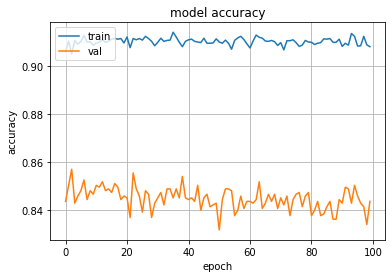

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

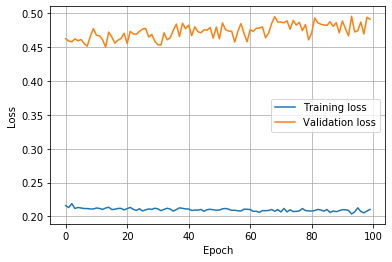

In [63]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
#plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
#plt.xlim(0,100)
plt.grid(True)

## Prediction



Geography: Germany

Credit Score: 500

Gender: Female

Age: 30 years old

Tenure: 2 years

Balance: \$ 50000

Number of Products: 1

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000



In [66]:
print(ann.predict(sc.transform([[0, 1, 0, 500, 0, 30, 2, 50000, 1, 1, 1, 50000]])) >0.5)

[[False]]


In [68]:
##customer does not leave the bank 

### Predicting the Test set results

In [69]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[713  81]
 [ 91 115]]


0.828

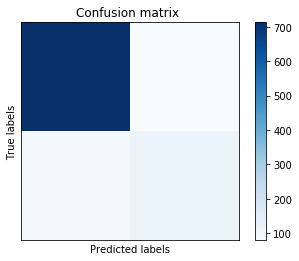

In [71]:

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()